In [1]:
# Dependencies
import pandas as pd
import matplotlib as plt

In [3]:
csvpath = '../DataCleaning/Output/PopulationDensity.csv'
final_df = pd.read_csv(csvpath)
final_df

,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population",PopulationDensity
0,Appling,1717,142,50,9250.58,269.38,14.018288
1,Atkinson,745,108,15,8943.58,180.07,9.311241
2,Bacon,1002,73,25,8786.39,219.22,15.260078
3,Baker,151,31,6,4845.96,192.55,3.600683
4,Baldwin,3542,273,90,7972.45,202.57,67.588266
...,...,...,...,...,...,...,...
154,Whitfield,13628,660,169,13019.72,161.46,138.054912
155,Wilcox,434,66,26,4937.43,295.79,9.040133
156,Wilkes,611,61,15,6101.46,149.79,8.128280
157,Wilkinson,665,108,21,7455.99,235.45,7.802590


<AxesSubplot:xlabel='PopulationDensity', ylabel='Cases'>

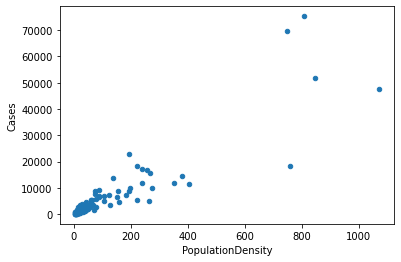

In [8]:
final_df.plot(kind='scatter', x='PopulationDensity', y='Cases')
